In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
#Import Data
bank_data = pd.read_csv('banksim.csv')

In [3]:
bank_data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [4]:
print("Data type for each features are:\n", bank_data.dtypes)

Data type for each features are:
 step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object


In [5]:
print(bank_data.isnull().sum())

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64


In [6]:
bank_data['age'] = bank_data['age'].astype('string')
for i in range(len(bank_data)):
    if bank_data['age'][i] == "'U'":
        bank_data.loc[i, 'age'] = np.nan
    else:
        bank_data['age'][i] = bank_data['age'][i].replace("'", '').strip()
bank_data['age'] = bank_data['age'].astype('float')

In [7]:
age_imputer = SimpleImputer(strategy='median')
age_imputer.fit(bank_data[['age']])
bank_data['age'] = age_imputer.transform(bank_data[['age']])

In [8]:
bank_data['amount'].value_counts()

26.67     146
14.93     146
17.57     145
17.26     143
16.12     143
         ... 
222.85      1
99.86       1
164.50      1
112.54      1
190.31      1
Name: amount, Length: 23767, dtype: int64

In [9]:
print(bank_data.isnull().sum())

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64


In [10]:
cat_cols = bank_data.select_dtypes(include= ['object']).columns
cat_cols

Index(['customer', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant',
       'category'],
      dtype='object')

In [11]:
label_encoder = LabelEncoder()
for col in cat_cols:
    bank_data[col] = label_encoder.fit_transform(bank_data[col])

In [12]:
bank_data['amount'].value_counts()

26.67     146
14.93     146
17.57     145
17.26     143
16.12     143
         ... 
222.85      1
99.86       1
164.50      1
112.54      1
190.31      1
Name: amount, Length: 23767, dtype: int64

In [13]:
bank_data = bank_data.drop(['zipcodeOri','zipMerchant'],axis=1)

In [14]:
correlation_matrix = bank_data.corr()
correlation_matrix

,step,customer,age,gender,merchant,category,amount,fraud
step,1.000000,0.005082,0.000687,-0.001107,-0.156195,-0.017269,-0.007961,-0.011898
customer,0.005082,1.000000,0.001849,-0.007568,0.013341,0.000166,0.005823,0.005236
age,0.000687,0.001849,1.000000,0.022321,0.006916,0.005370,-0.003897,-0.004016
gender,-0.001107,-0.007568,0.022321,1.000000,-0.007494,0.007700,-0.012888,-0.025047
merchant,-0.156195,0.013341,0.006916,-0.007494,1.000000,-0.245433,0.065795,0.104532
category,-0.017269,0.000166,0.005370,0.007700,-0.245433,1.000000,-0.098738,-0.114272
amount,-0.007961,0.005823,-0.003897,-0.012888,0.065795,-0.098738,1.000000,0.489967
fraud,-0.011898,0.005236,-0.004016,-0.025047,0.104532,-0.114272,0.489967,1.000000


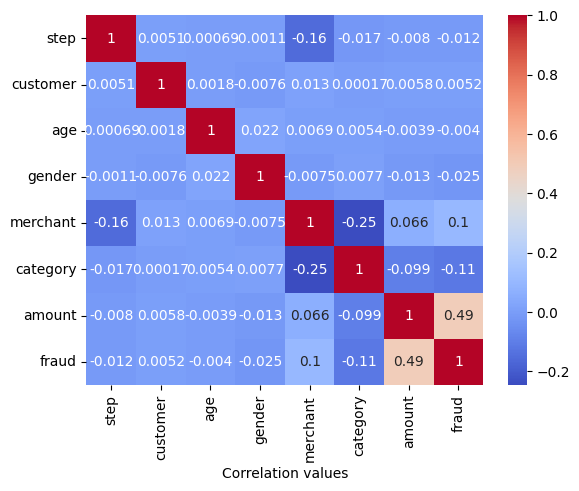

In [15]:
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.xlabel("Correlation values")
plt.show()

In [16]:
bank_data.describe()

,step,customer,age,gender,merchant,category,amount,fraud
count,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000
mean,94.986827,2042.317776,3.006227,1.451089,23.866580,11.066393,37.890135,0.012108
std,51.053632,1185.491845,1.324028,0.503291,8.590215,2.817118,111.402831,0.109369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,1020.000000,2.000000,1.000000,18.000000,12.000000,13.740000,0.000000
50%,97.000000,2030.000000,3.000000,1.000000,18.000000,12.000000,26.900000,0.000000
75%,139.000000,3059.000000,4.000000,2.000000,30.000000,12.000000,42.540000,0.000000
max,179.000000,4111.000000,6.000000,3.000000,49.000000,14.000000,8329.960000,1.000000


In [17]:
# Outlier detection and handling using the IQR method
Q1 = bank_data.quantile(0.25)
Q3 = bank_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((bank_data < (Q1 - 1.5 * IQR)) | (bank_data > (Q3 + 1.5 * IQR))).any(axis=1)
bank_data_cleaned = bank_data[~outliers]

In [18]:
# Features (X) and Target Variable (y)
X = bank_data.drop('fraud', axis=1)
y = bank_data['fraud']

# Split the data into training and testing sets 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape - X:", X_train.shape, " y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, " y:", y_test.shape)

Training set shape - X: (475714, 7)  y: (475714,)
Testing set shape - X: (118929, 7)  y: (118929,)


**Oversampling Using SMOTE**


Using SMOTE(Synthetic Minority Oversampling Technique) [2] for balancing the dataset. Resulted counts show that now we have exact number of class instances (1 and 0).




In [ ]:
# Oversampling using SMOTE
X = bank_data.drop('fraud', axis=1)
y = bank_data['fraud']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

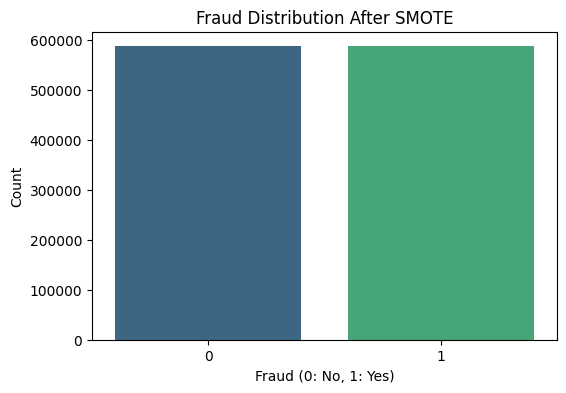


Fraud distribution after oversampling:
0    587443
1    587443
Name: fraud, dtype: int64


In [ ]:
# Combine X_resampled and y_resampled into a new DataFrame
oversampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='fraud')], axis=1)

# Visualize the distribution of the 'fraud' column after oversampling
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud', data=oversampled_data, palette='viridis')
plt.title('Fraud Distribution After SMOTE')
plt.xlabel('Fraud (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Display the distribution of the 'fraud' column after oversampling
print("\nFraud distribution after oversampling:")
print(oversampled_data['fraud'].value_counts())

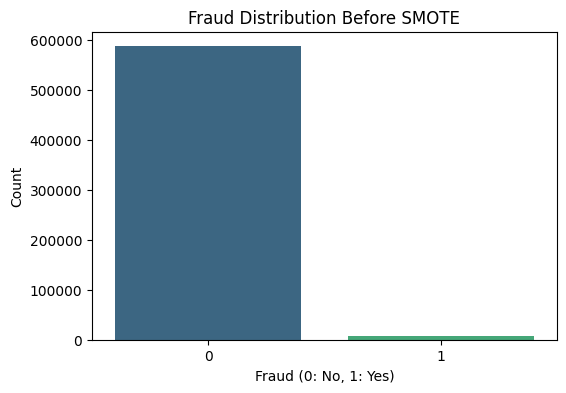

Fraud distribution before using SMOTE:
0    587443
1      7200
Name: fraud, dtype: int64


In [ ]:
# Display the distribution of the 'fraud' column before using SMOTE
fraud_distribution_before = bank_data['fraud'].value_counts()

# Visualize the distribution with a bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud', data=bank_data, palette='viridis')
plt.title('Fraud Distribution Before SMOTE')
plt.xlabel('Fraud (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Display the numerical distribution counts
print("Fraud distribution before using SMOTE:")
print(fraud_distribution_before)

check overfitting and underfitting
hyperparamter tuning


**Implementing Neural Networks**


Training set shape - X: (475714, 7)  y: (475714,)
Testing set shape - X: (118929, 7)  y: (118929,)


In [19]:
# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Display the shape of the normalized training and testing sets
print("Normalized Training set shape - X:", X_train_normalized.shape, " y:", y_train.shape)
print("Normalized Testing set shape - X:", X_test_normalized.shape, " y:", y_test.shape)

Normalized Training set shape - X: (475714, 7)  y: (475714,)
Normalized Testing set shape - X: (118929, 7)  y: (118929,)


<Figure size 1200x800 with 0 Axes>

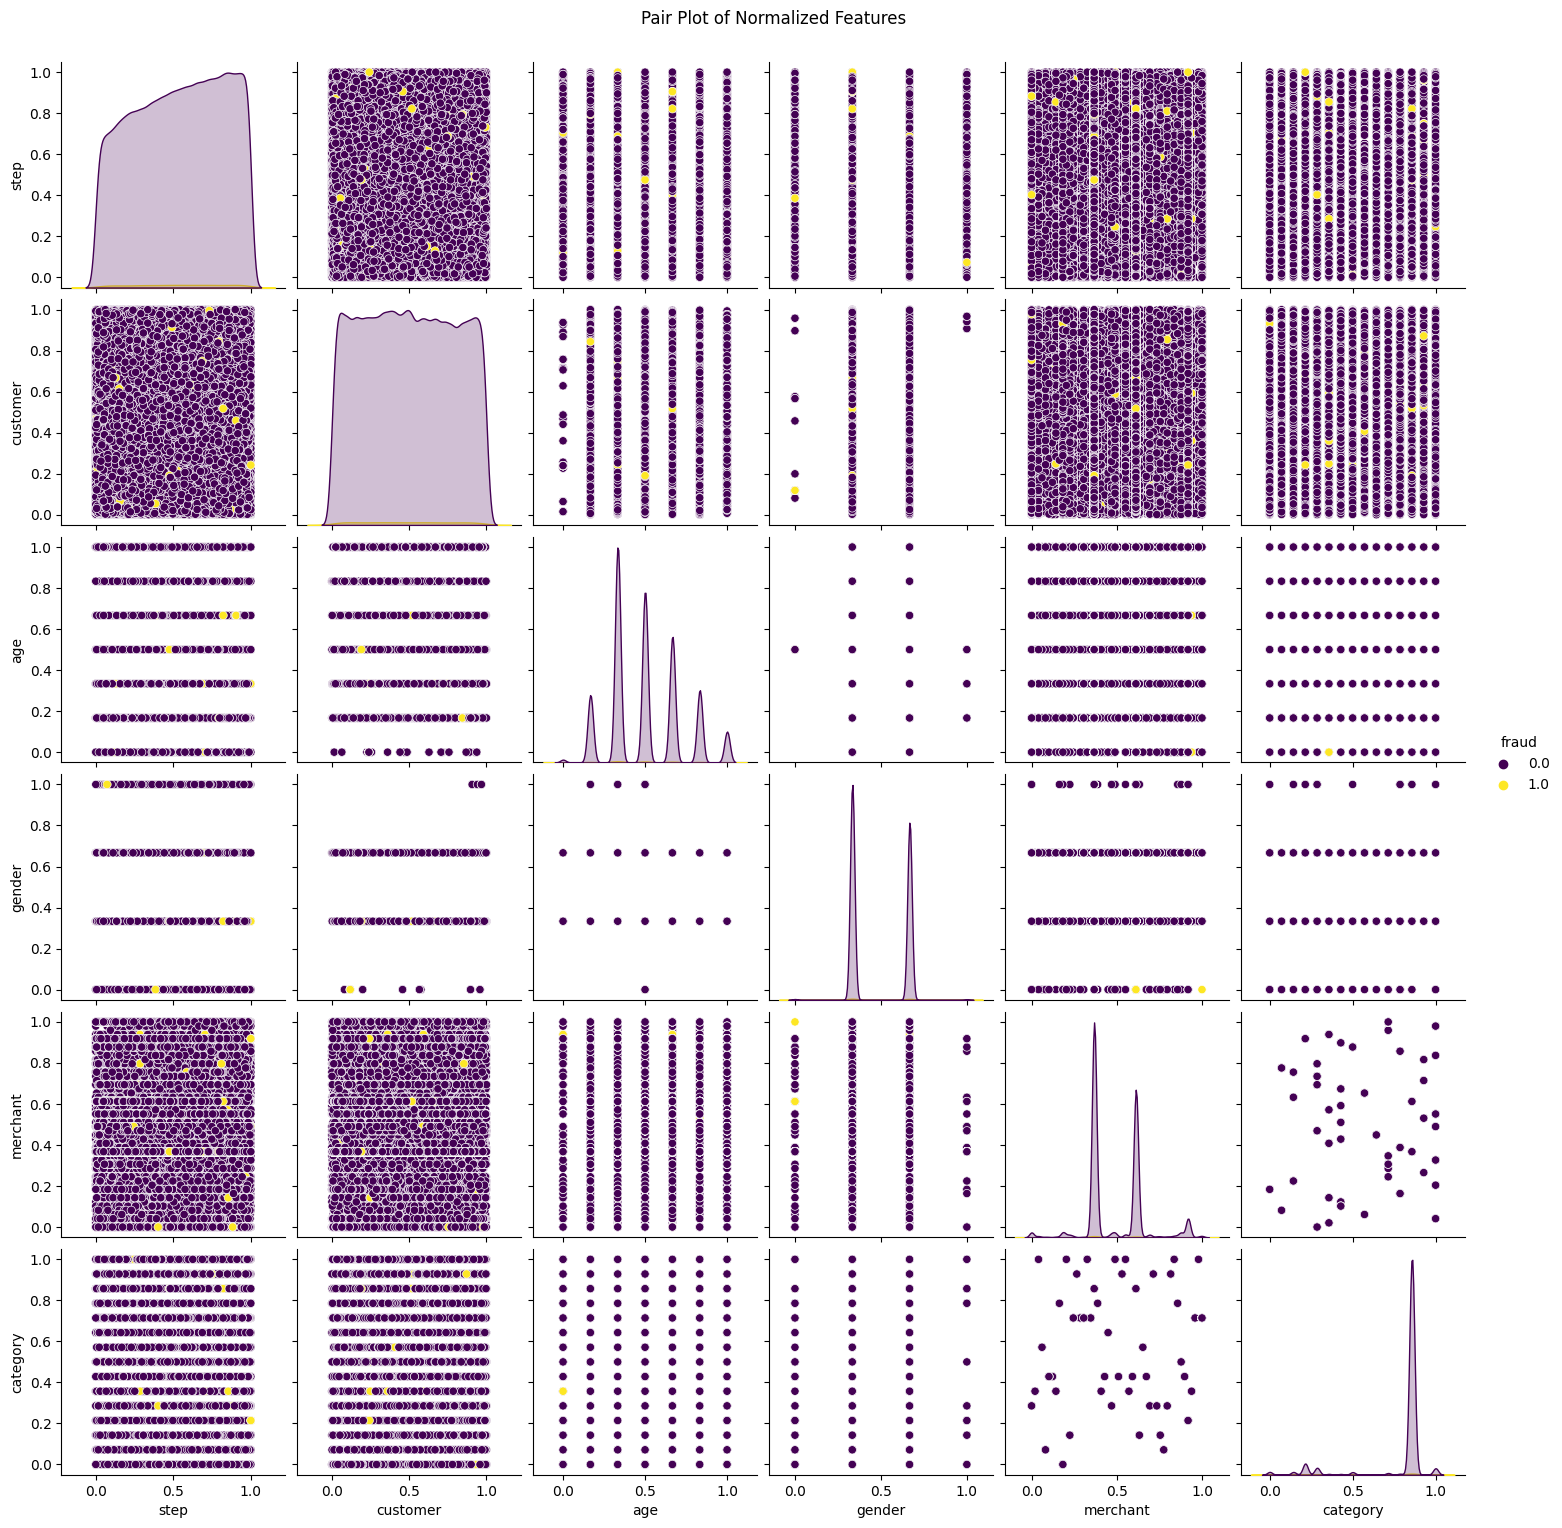

In [ ]:
normalized_features = pd.DataFrame(X_train_normalized, columns=X.columns)

# Select a subset of features for visualization (adjust as needed)
selected_features = normalized_features[['step', 'customer', 'age', 'gender', 'merchant', 'category']]

# Add the target variable for color differentiation
selected_features['fraud'] = y_train

# Create a pair plot
plt.figure(figsize=(12, 8))
sns.pairplot(selected_features, hue='fraud', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Normalized Features', y=1.02)
plt.show()

In [ ]:
# Define and create the neural network model
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               800       
                                                                 
 activation_6 (Activation)   (None, 100)               0         
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 activation_7 (Activation)   (None, 100)               0         
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

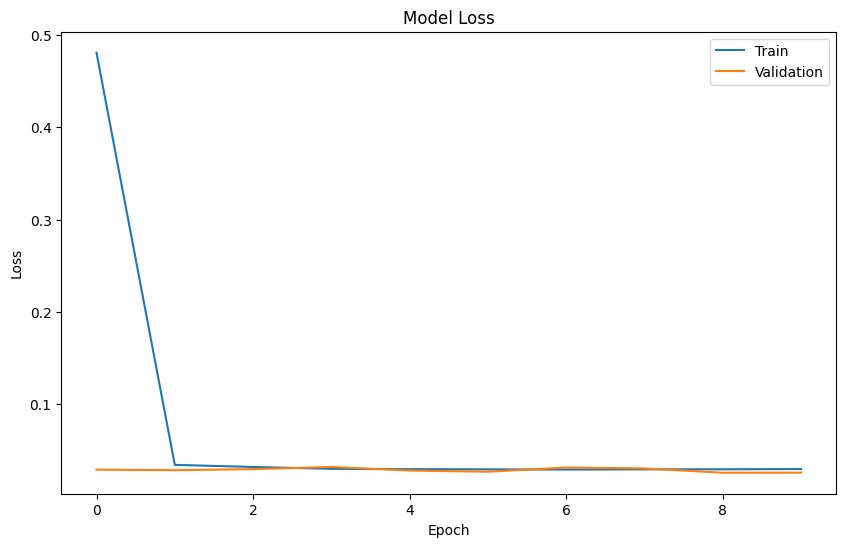

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam

# Adjust the input shape accordingly
input_shape = X_train.shape[1]

# Build the model
model = Sequential()

# The first hidden layer has 100 neurons
model.add(Dense(100, input_shape=(input_shape,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The second hidden layer has 100 neurons
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The final layer is the output layer with 1 neuron for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the built model
model.summary()

# Train the model and collect training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Visualize the training and validation loss
plt.figure(figsize=(10, 6))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

> training and cross validation loss
> mae and mse depends on hidden layers.. so experiment with the layers


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

3717/3717 [==============================] - 6s 2ms/step - loss: 5.0162 - accuracy: 0.9881
Test Loss: 5.0162, Test Accuracy: 0.9881


Epoch 1/50
11893/11893 [==============================] - 30s 2ms/step - loss: 40.1169 - mae: 1.0048 - mse: 40.1169 - val_loss: 6.4562 - val_mae: 1.9899 - val_mse: 6.4562
Epoch 2/50
11893/11893 [==============================] - 27s 2ms/step - loss: 9.6262 - mae: 0.7431 - mse: 9.6262 - val_loss: 0.1333 - val_mae: 0.1684 - val_mse: 0.1333
Epoch 3/50
11893/11893 [==============================] - 27s 2ms/step - loss: 4.3401 - mae: 0.5680 - mse: 4.3401 - val_loss: 0.4776 - val_mae: 0.2024 - val_mse: 0.4776
Epoch 4/50
11893/11893 [==============================] - 26s 2ms/step - loss: 1.9045 - mae: 0.3658 - mse: 1.9045 - val_loss: 0.0207 - val_mae: 0.0671 - val_mse: 0.0207
Epoch 5/50
11893/11893 [==============================] - 28s 2ms/step - loss: 1.2141 - mae: 0.3027 - mse: 1.2141 - val_loss: 0.0279 - val_mae: 0.0410 - val_mse: 0.0279
Epoch 6/50
11893/11893 [==============================] - 27s 2ms/step - loss: 1.5083 - mae: 0.3089 - mse: 1.5083 - val_loss: 0.9469 - val_mae: 0.5902 - 

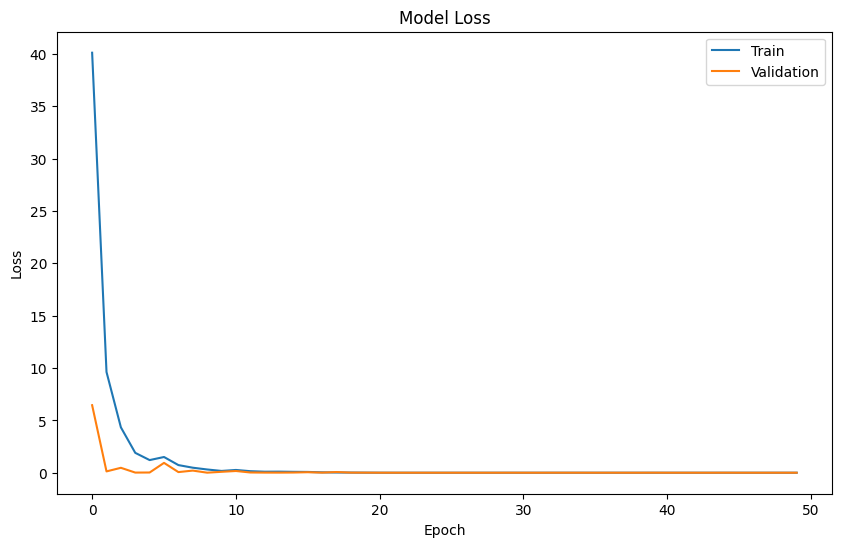

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Build a neural network model
model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model and collect training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Visualize the training and validation loss (Mean Squared Error in this case)
plt.figure(figsize=(10, 6))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               800       
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11001 (42.97 KB)
Trainable params: 11001 (42.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
23498/2

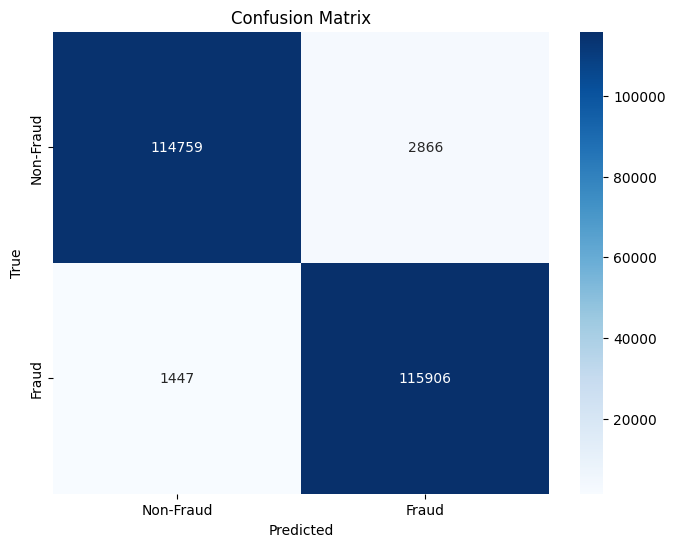

In [29]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

# Normalize the features using MinMaxScaler after SMOTE
scaler = MinMaxScaler()
X_resampled_normalized = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_normalized, y_resampled, test_size=0.2, random_state=42)

# Build the Keras model (assuming a binary classification problem)
model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the built model
model.summary()

# Train the model and collect training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')
# Predict the Test set results
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Epoch 1/10
11893/11893 [==============================] - 33s 3ms/step - loss: 0.1919 - accuracy: 0.9877 - val_loss: 0.3861 - val_accuracy: 0.8848
Epoch 2/10
11893/11893 [==============================] - 30s 3ms/step - loss: 0.1105 - accuracy: 0.9897 - val_loss: 0.0619 - val_accuracy: 0.9924
Epoch 3/10
11893/11893 [==============================] - 29s 2ms/step - loss: 0.0628 - accuracy: 0.9908 - val_loss: 0.0558 - val_accuracy: 0.9923
Epoch 4/10
11893/11893 [==============================] - 33s 3ms/step - loss: 0.0432 - accuracy: 0.9919 - val_loss: 0.0378 - val_accuracy: 0.9929
Epoch 5/10
11893/11893 [==============================] - 30s 2ms/step - loss: 0.0311 - accuracy: 0.9928 - val_loss: 0.0285 - val_accuracy: 0.9931
Epoch 6/10
11893/11893 [==============================] - 29s 2ms/step - loss: 0.0273 - accuracy: 0.9932 - val_loss: 0.0265 - val_accuracy: 0.9933
Epoch 7/10
11893/11893 [==============================] - 30s 3ms/step - loss: 0.0264 - accuracy: 0.9935 - val_loss: 0

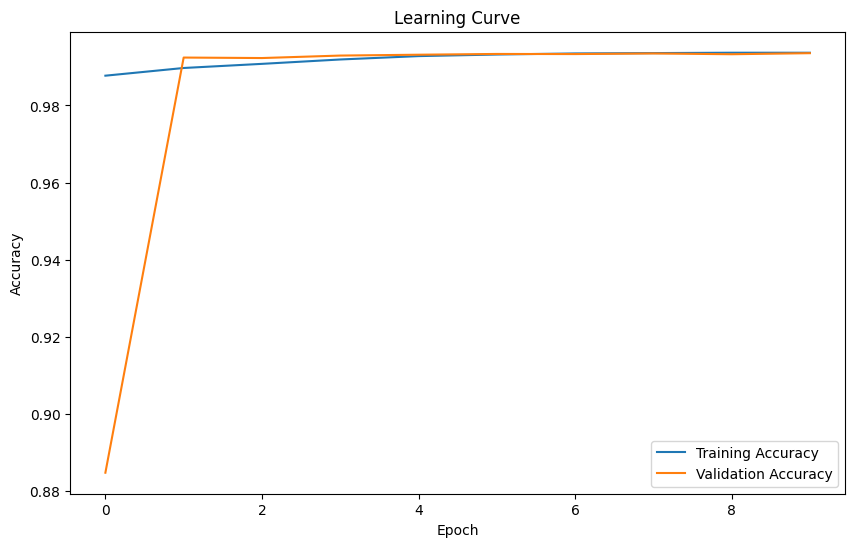

3717/3717 [==============================] - 7s 2ms/step
ROC AUC Score: 0.9646736779157689


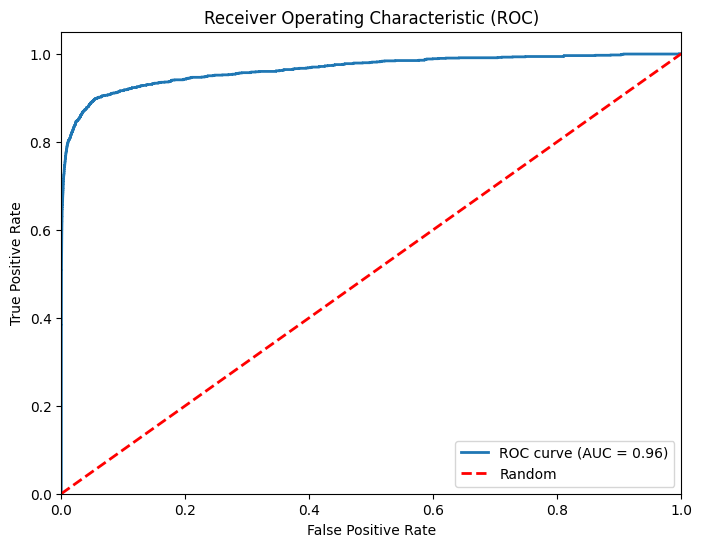

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
def plot_learning_curve(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()
plot_learning_curve(history)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC Score:', roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Display confusion matrix and metrics
print("Confusion Matrix:")
print(conf_matrix)

print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[117405    107]
 [   568    849]]

Performance Metrics:
Accuracy: 0.9943
Precision: 0.8881
Recall: 0.5992
F1 Score: 0.7155


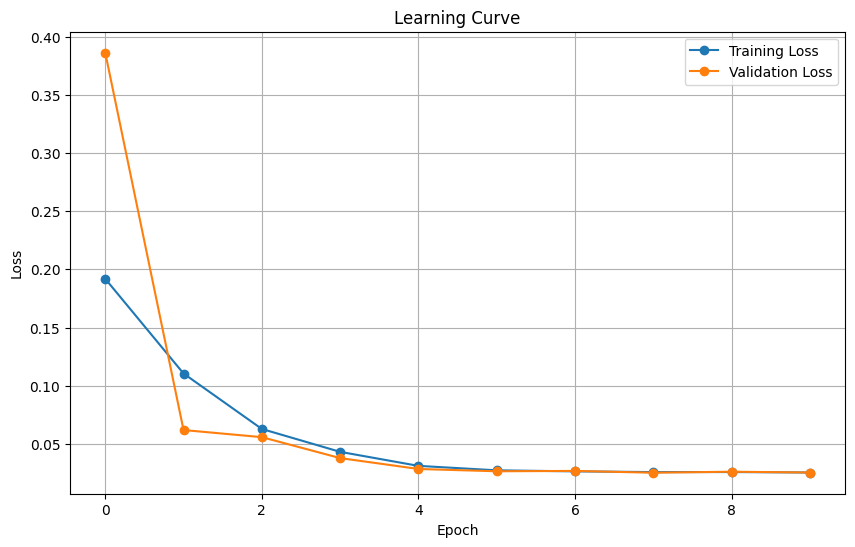

In [35]:
# Extract training loss and validation loss from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

def plot_learning_curve(history):
    # Plot training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(training_loss, label='Training Loss', marker='o')
    plt.plot(validation_loss, label='Validation Loss', marker='o')
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

plot_learning_curve(history)

In [37]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


3717/3717 [==============================] - 8s 2ms/step - loss: 0.0229 - accuracy: 0.9943
Test Loss: 0.0229, Test Accuracy: 0.9943
3717/3717 [==============================] - 7s 2ms/step - loss: 0.0229 - accuracy: 0.9943
Test Loss: 0.0229, Test Accuracy: 0.9943
